In this file, will explore different ways of loading MRI data

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
sample_flair_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii"
sample_seg_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii"

# Reading .nii files using dipy

In [53]:
from dipy.io.image import load_nifti

View Flair image

In [54]:
data_flair, affine, im = load_nifti(sample_flair_path, return_img=True)

In [55]:
data_flair.shape

(240, 240, 155)

Cast as array of ints (probably want float32 eventually for operations)

In [56]:
data_flair=data_flair.astype(np.int)

Slice looking down

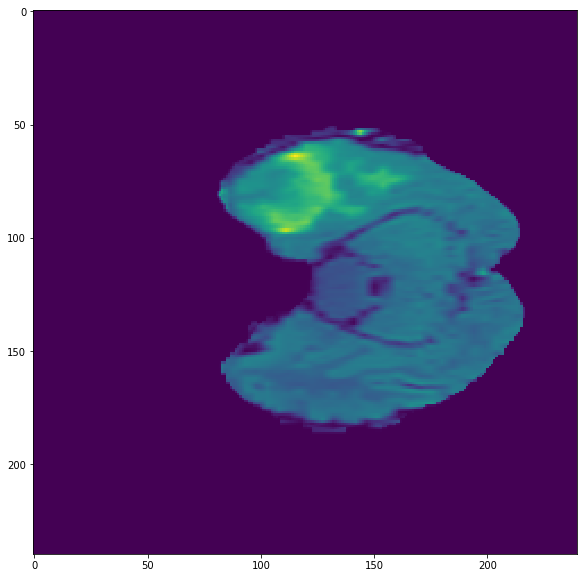

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(data_flair[:,:,50])
plt.show()

What value is tumor?

In [58]:
np.max(data_flair[:,:,50])

1051

Slice from side

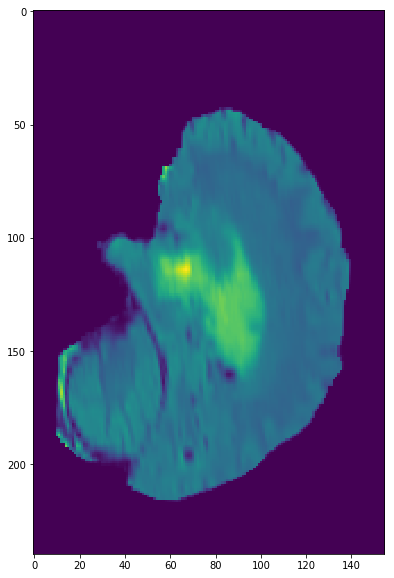

In [59]:
plt.figure(figsize=(10,10))
plt.imshow(data_flair[100, :, :])
plt.show()

Slice from front

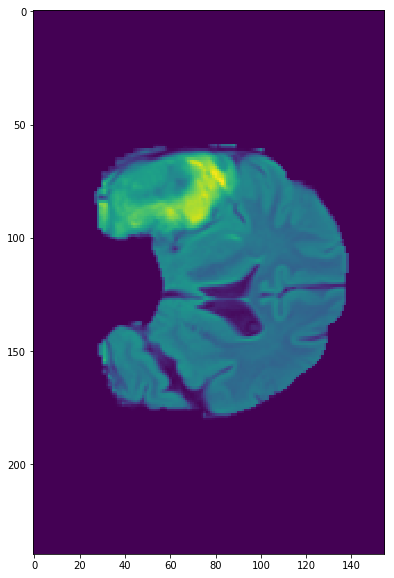

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(data_flair[:, 100, :])
plt.show()

# Segmentation data: what we are training to identify
data ranges from 0 (nothing) to 4 (most severe?)

In [61]:
data_seg, affine, im = load_nifti(sample_seg_path, return_img=True)

In [62]:
data_seg=data_seg.astype(int)

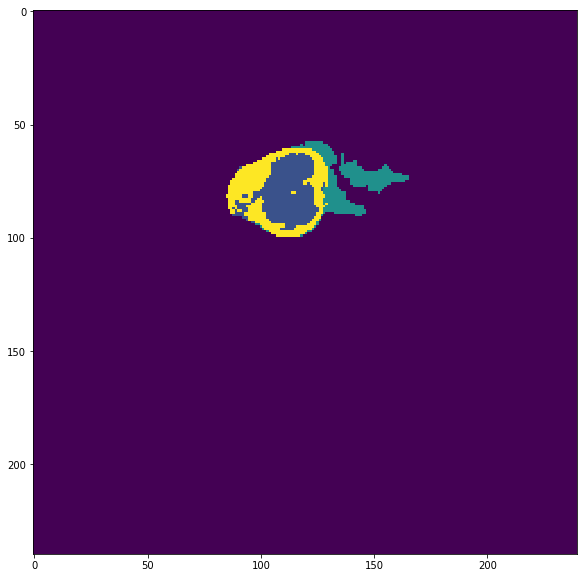

In [63]:
plt.figure(figsize=(10,10))
plt.imshow(data_seg[:,:,50])
plt.show()

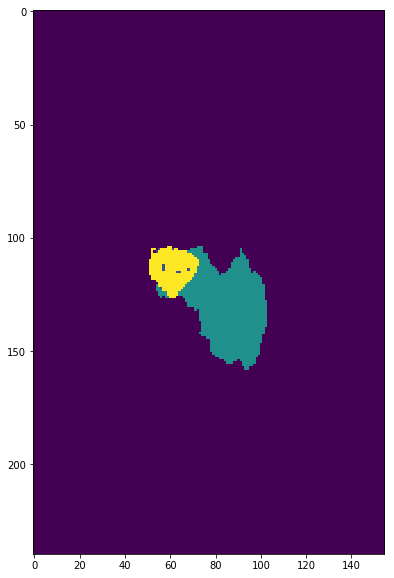

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(data_seg[100, :, :])
plt.show()

# Extract coordinates of all tumor voxels

In [69]:
np.argwhere(data_seg!=0)

array([[ 57, 123,  52],
       [ 57, 124,  52],
       [ 57, 124,  54],
       ...,
       [111, 122,  71],
       [111, 123,  71],
       [111, 124,  71]])

Extract coordinates of high grade tumors:

In [70]:
np.argwhere(data_seg==4)

array([[ 60, 111,  52],
       [ 60, 111,  54],
       [ 60, 112,  52],
       ...,
       [102, 117,  66],
       [102, 118,  59],
       [102, 118,  60]])